In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/dataframe_final.csv', index_col=0)
data_std = pd.read_csv('data/dataframe_std.csv', index_col=0)
label = pd.read_csv('data/label_final.csv', index_col=0)
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,834,346,668,1043,1,70,767,0,642,682,3100
2022-12-26,834,405,655,2675,0,46,249,1852,821,758,1270
2022-12-26,834,432,594,1716,1,662,1373,75,655,558,1652
2022-12-26,834,377,393,3764,1,595,2132,80,621,549,897


In [18]:

# split index's string(YYYY-mm-dd) into year, month, day
data['year'] = data.index.str.split('-').str[0].astype(int)
data['month'] = data.index.str.split('-').str[1].astype(int)

data_std['year'] = data_std.index.str.split('-').str[0].astype(int)
data_std['month'] = data_std.index.str.split('-').str[1].astype(int)

label['year'] = label.index.str.split('-').str[0].astype(int)
label['month'] = label.index.str.split('-').str[1].astype(int)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler

features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
def getCorrelationAt(year, month):
    # show effect of each column on label
    # for especially y year m month
    # x-axis: column value
    # y-axis: label value
    # hue: year, month
    # regression plot
    # scatter plot
    # show correlation
    # for each 10 columns, 10 plots
    data_year = data_std[data_std['year'] == year]
    data_month = data_year[data_year['month'] == month]
    label_year = label[label['year'] == year]
    label_month = label_year[label_year['month'] == month]
    
    dataForShow = data_month[features]
    std = StandardScaler()
    dataForShow = pd.DataFrame(std.fit_transform(dataForShow), columns=features, index=dataForShow.index)
    dataForShow['label'] = label_month['0']
    corrList = []
    for i, feature in enumerate(features):
        sns.regplot(x=feature, y='label', data=dataForShow)

        slope, intercept, corr, p_value, std_err = scipy.stats.linregress(dataForShow[feature], dataForShow['label'])
        corrList.append((corr, slope, intercept))
    return corrList

    

In [19]:
data_rec5 = data_std[data_std['year'] >= 2018]
label_rec5 = label[label['year'] >= 2018]

2018-1
[(-0.21763116124635684, -6.215073864434096, 49.952), (0.00956538586629681, 0.2731666704362806, 49.952), (0.12731466889719625, 3.635830763804698, 49.952), (0.03705948284047735, 1.0583384378975285, 49.952), (-0.038674262130759494, -1.104453031535622, 49.952), (0.028280322714264956, 0.8076246690621028, 49.952), (-0.009364895334861041, -0.26744109577658176, 49.952), (0.004803117752681401, 0.1371666237570532, 49.952), (-0.06982121101457493, -1.9939423255137687, 49.952), (0.1134542638430476, 3.240007662419893, 49.952)]
2018-2
[(-0.1546223826981301, -4.384578243226557, 49.72), (0.04829773396875295, 1.369563641830358, 49.72), (0.1213943384991761, 3.442341051447298, 49.72), (0.01224129748348465, 0.34712262014314355, 49.72), (-0.0031947205635409395, -0.09059168557398958, 49.72), (0.10433342876315571, 2.9585502034932274, 49.72), (-0.07819803744774917, -2.2174371373243824, 49.72), (0.0462791368297584, 1.312322918055236, 49.72), (0.0490503273526875, 1.3909046955614852, 49.72), (0.17046642840

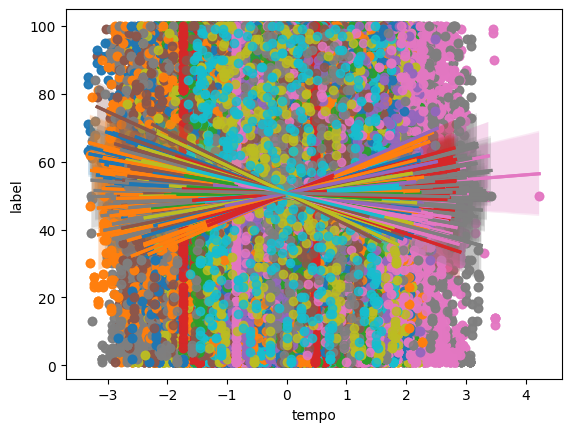

In [20]:
features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
ls = []
for i, y in enumerate(range(2018, 2023)):
    for j, m in enumerate(range(1, 13)):
        print(f'{y}-{m}')
        print(getCorrelationAt(y, m))
        corrList = getCorrelationAt(y, m)
        ls.append(corrList)

In [23]:
dfs = np.zeros((60, 10, 3))
for i, k in enumerate(ls):
    for j, tp in enumerate(k):
        dfs[i][j] = tp

dfs

array([[[-2.17631161e-01, -6.21507386e+00,  4.99520000e+01],
        [ 9.56538587e-03,  2.73166670e-01,  4.99520000e+01],
        [ 1.27314669e-01,  3.63583076e+00,  4.99520000e+01],
        ...,
        [ 4.80311775e-03,  1.37166624e-01,  4.99520000e+01],
        [-6.98212110e-02, -1.99394233e+00,  4.99520000e+01],
        [ 1.13454264e-01,  3.24000766e+00,  4.99520000e+01]],

       [[-1.54622383e-01, -4.38457824e+00,  4.97200000e+01],
        [ 4.82977340e-02,  1.36956364e+00,  4.97200000e+01],
        [ 1.21394338e-01,  3.44234105e+00,  4.97200000e+01],
        ...,
        [ 4.62791368e-02,  1.31232292e+00,  4.97200000e+01],
        [ 4.90503274e-02,  1.39090470e+00,  4.97200000e+01],
        [ 1.70466428e-01,  4.83386286e+00,  4.97200000e+01]],

       [[-1.15483708e-01, -3.29227504e+00,  4.99600000e+01],
        [ 7.12446130e-03,  2.03108183e-01,  4.99600000e+01],
        [ 1.10105572e-01,  3.13895209e+00,  4.99600000e+01],
        ...,
        [ 3.21696237e-02,  9.17109877e-01,

In [22]:
dfs.shape

(60, 10, 3)

In [28]:
labels = np.zeros((60, 10))

for i in range(60):
    for j in range(10):
        labels[i][j] = data_rec5[features].iloc[i,j]

In [29]:
dfs = dfs.reshape(600, 3)
labels = labels.reshape(600)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfs, labels, test_size=0.2, random_state=42)

LinearRegression
MSE: 0.8683495297456766
R2: 0.015002764964272886


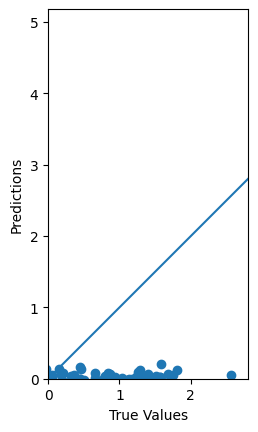

Ridge
MSE: 0.8657817360012231
R2: 0.017915497282063653


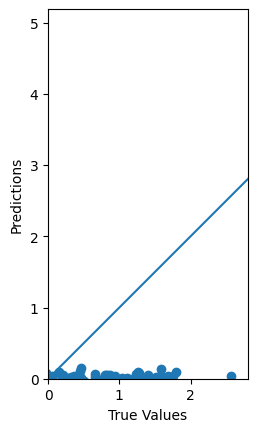

Lasso
MSE: 0.8833570380452135
R2: -0.0020207418995461524


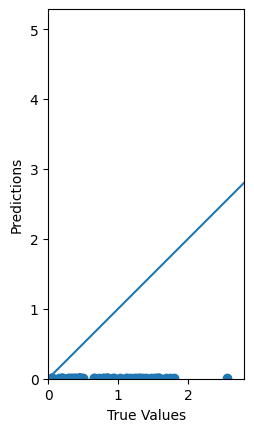

ElasticNet
MSE: 0.8833570380452135
R2: -0.0020207418995461524


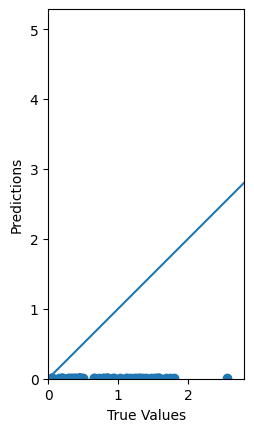

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_names[i]}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R2: {r2_score(y_test, y_pred)}')
    
    

In [27]:
data_std.drop(['year', 'month'], axis=1, inplace=True)
label.drop(['year', 'month'], axis=1, inplace=True)

In [7]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        if idx != dayformat:
            X = dataframe.loc[dayformat].values
            y = label.loc[dayformat].values
            
            s = np.arange(X.shape[0])
            np.random.shuffle(s)
            X = X[s]
            y = y[s]
            
            Xs.append(X)
            ys.append(y)
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [8]:
Xs, ys = create_sequences(1963, data_std, label)

In [9]:
Xs.shape, ys.shape

((3131,), (3131,))

In [10]:
Xs[:10]

array([array([[-1.72229753, -0.30906552, -0.83345586, ...,  0.49936341,
               -0.9411204 , -0.9822268 ],
              [-1.72229753, -0.85895463, -1.64568331, ..., -0.6182211 ,
               -0.9872094 , -0.80070963],
              [-1.72229753,  0.41779939, -1.10419835, ..., -1.26955221,
                0.01417883, -1.30122733],
              ...,
              [-1.72229753, -0.06256351,  0.93138403, ...,  1.00832706,
                1.27534141,  0.88187135],
              [-1.72229753, -0.50500302, -0.80838711, ..., -0.00960024,
               -0.26654507,  1.10155116],
              [-1.72229753,  0.03856552, -1.0490471 , ...,  0.07226105,
                0.48344862,  1.80266735]])                             ,
       array([[-1.71790222,  0.63269858, -0.36216339, ..., -1.76071993,
                1.17059368,  2.04827818],
              [-1.71790222, -0.71358165, -2.54314451, ...,  0.00463651,
               -0.61430751,  1.3554795 ],
              [-1.71790222, -0.2458598

In [75]:
def sequenceFlatter(X):
    temp = []
    for x in X:
        for i in x:
            temp.append(i)
    temp = np.array(temp)
    return temp

In [76]:
X = sequenceFlatter(Xs)
y = sequenceFlatter(ys)

In [77]:
# fit model and get coefficient

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [78]:

def modelingAndVisualizing(X_train, X_test, y_train, y_test):
    rfr = RandomForestRegressor().fit(X_train, y_train)
    print('Train score: {:.2f}'.format(rfr.score(X_train, y_train)))
    print('Test score: {:.2f}'.format(rfr.score(X_test, y_test)))
    

    return rfr


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
rfr = modelingAndVisualizing(X_train, X_test, y_train, y_test)

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [67]:
rfr.feature_importances_

array([0.4167468 , 0.06514679, 0.06590776, 0.06734516, 0.00775039,
       0.067253  , 0.06920195, 0.03997074, 0.06573575, 0.06671895,
       0.06822271])